## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt
import tqdm
from timeit import default_timer as timer

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

c:\Users\fre_f\anaconda3\envs\FF\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\fre_f\anaconda3\envs\FF\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, m

In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/Genus_DESL.csv')

In [4]:
df.head()

,Index,DESL,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,...,Light treatment,OSDI score,DEQ5 score,TBUT OD,TBUT OS,OSS OD,OSS OS,ST OD,ST OS,Demodicosis
0,P1,3,0.092816,0.001058,0.042075,0.0,0.0,0.000000,0.0,0.000000,...,0,NaN,NaN,3,3,0,0,23,23,0
1,P2,3,0.698862,0.001191,0.004366,0.0,0.0,0.000000,0.0,0.000000,...,0,31.25,17.0,2,4,1,3,14,18,0
2,P3,2,0.034017,0.259365,0.003640,0.0,0.0,0.000000,0.0,0.000000,...,1,33.30,16.0,8,8,3,3,11,8,0
3,P4,3,0.029042,0.177362,0.015877,0.0,0.0,0.127216,0.0,0.000000,...,0,93.75,21.0,3,2,2,2,12,11,0
4,P5,1,0.307662,0.164086,0.050351,0.0,0.0,0.000331,0.0,0.000463,...,1,6.25,7.0,11,11,0,0,22,32,0


In [5]:
df.iloc[:,2:600]

,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,Finegoldia,Acinetobacter,...,Dyella,Actinopolymorpha,Trichococcus,melongena,Methylophilus,Murdochiella,Intrasporangium,sp10518,sp44151,Limnobacter
0,0.092816,0.001058,0.042075,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.006020,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
1,0.698862,0.001191,0.004366,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
2,0.034017,0.259365,0.003640,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
3,0.029042,0.177362,0.015877,0.000000,0.0,0.127216,0.0,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
4,0.307662,0.164086,0.050351,0.000000,0.0,0.000331,0.0,0.000463,0.0,0.002183,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.358462,0.185519,0.108214,0.016877,0.0,0.000397,0.0,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
57,0.077600,0.355253,0.048227,0.000000,0.0,0.006814,0.0,0.036518,0.0,0.001125,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
58,0.296309,0.601019,0.004895,0.000000,0.0,0.004631,0.0,0.000000,0.0,0.000000,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0
59,0.834877,0.046375,0.005028,0.000000,0.0,0.008997,0.0,0.004829,0.0,0.006285,...,0,0.0,0.0,0,0.0,0.0,0.0,0,0,0


In [6]:
df.iloc[:,1]

0     3
1     3
2     2
3     3
4     1
     ..
56    3
57    2
58    2
59    2
60    3
Name: DESL, Length: 61, dtype: int64

In [7]:
X = df.iloc[:,2:600]
y = df.iloc[:,1]

## Train, predict and explain

### XGBoost

In [8]:
le = LabelEncoder()
y_xgb = le.fit_transform(y)


clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y_xgb, cv=looxgb, scoring='accuracy', return_estimator=True)


In [9]:
xgb_scores

{'fit_time': array([0.34837055, 0.35690713, 0.33579278, 0.32424188, 0.31590533,
        0.31617546, 0.33347988, 0.3216331 , 0.33006501, 0.3270638 ,
        0.32985926, 0.34299302, 0.34804916, 0.34272385, 0.34306073,
        0.33535719, 0.34700584, 0.36118436, 0.34749579, 0.34164476,
        0.34600782, 0.34613848, 0.3411448 , 0.3372252 , 0.33814716,
        0.33128214, 0.34093618, 0.33370256, 0.33787394, 0.32605124,
        0.32847857, 0.32702088, 0.32316422, 0.32123113, 0.32120848,
        0.3202064 , 0.32318854, 0.32120991, 0.32826424, 0.32458782,
        0.31803823, 0.32915545, 0.3257947 , 0.32123327, 0.32990456,
        0.321738  , 0.31510997, 0.33126378, 0.3284595 , 0.33204055,
        0.32974195, 0.3404038 , 0.32319736, 0.3272922 , 0.32253671,
        0.32550097, 0.3282373 , 0.33350539, 0.34729314, 0.33890176,
        0.33654213]),
 'score_time': array([0.01501632, 0.02403069, 0.0120523 , 0.0198772 , 0.01195812,
        0.02268386, 0.01796436, 0.02004242, 0.01916504, 0.02004266,


In [10]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

The most important features for estimator 0:
                              Importance
Variovorax                      0.098368
BurkholderiaParaburkholderia    0.051287
sp35665                         0.048631
Cloacibacterium                 0.047529
sp30425                         0.042475
...                                  ...
sp35239                         0.000000
Aureimonas                      0.000000
Jatrophihabitans                0.000000
Lysinibacillus                  0.000000
Limnobacter                     0.000000

[598 rows x 1 columns]
The most important features for estimator 1:
                  Importance
Variovorax          0.067390
sp30425             0.061034
Aerococcus          0.060757
Lactococcus         0.053936
Cloacibacterium     0.053312
...                      ...
sp35190             0.000000
sp35239             0.000000
Aureimonas          0.000000
Jatrophihabitans    0.000000
Limnobacter         0.000000

[598 rows x 1 columns]
The most important fea

In [11]:
feature_importances_complete

,Importance
Variovorax,0.098368
BurkholderiaParaburkholderia,0.051287
sp35665,0.048631
Cloacibacterium,0.047529
sp30425,0.042475
...,...
Aureimonas,0.000000
Jatrophihabitans,0.000000
Lysinibacillus,0.000000
sp35669,0.000000


In [12]:
feature_importances_complete.shape

(36478, 1)

In [13]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [14]:
fic[:15]

,Importance
Variovorax,0.074605
Cloacibacterium,0.051026
Comamonas,0.041495
sp30425,0.040010
Aerococcus,0.039681
Nitriliruptor,0.034739
BurkholderiaParaburkholderia,0.031745
Bradyrhizobium,0.031368
Lactococcus,0.030195
Microbacterium,0.029873


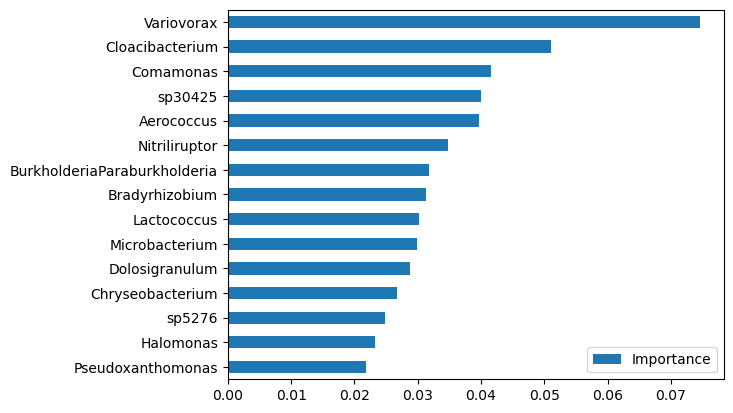

In [24]:

plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [25]:
# Calculate the SHAP values for every estimator 
for idx, estimator in enumerate(xgb_scores['estimator']):
    xgbshap = estimator.fit(X, y_xgb)
    explainerxgb = shap.Explainer(xgbshap, X)
    shap_valuesxgb = explainerxgb.shap_values(X.iloc[:,:])

In [26]:
shap_valuesxgb

[array([[-0.18077412,  0.        , -0.20342519, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.35718702,  0.        ,  0.16189856, ...,  0.        ,
          0.        ,  0.        ],
        [-0.17419221,  0.        ,  0.13476612, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.16043943,  0.        ,  0.15305016, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.36636652,  0.        ,  0.15305016, ...,  0.        ,
          0.        ,  0.        ],
        [-0.19199492,  0.        , -0.07519355, ...,  0.        ,
          0.        ,  0.        ]]),
 array([[-0.11108034, -0.6471741 , -0.24158917, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00916925, -0.37306559,  0.39732328, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.04107047,  0.36009118,  0.52423077, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.01311087,  0.55317691,  0.50079125, ...,  

In [27]:
len(shap_valuesxgb)

4

In [28]:
shap_valuesxgb[0].shape

(61, 598)

In [29]:
for array in range(len(shap_valuesxgb)):
    shap_valuesxgb_mean = np.mean(shap_valuesxgb,1)

In [30]:
shap_valuesxgb_mean

array([[-1.27402642e-17,  0.00000000e+00, -2.27504718e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.33192336e-18, -6.37013211e-18,  1.82003775e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.82003775e-18,  0.00000000e+00, -1.09202265e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.08064741e-18, -2.84380898e-20,  1.09202265e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [31]:
shap_valuesxgb_mean.shape

(4, 598)

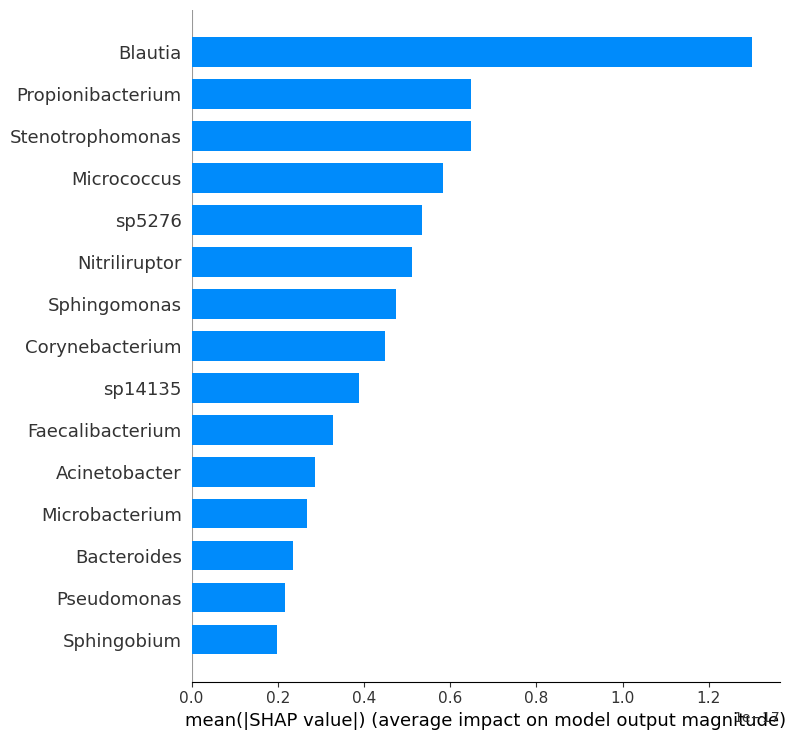

In [32]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15)

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', return_estimator=True)

In [ ]:
lgbm_scores

In [ ]:
for idx, estimator in enumerate(lgbm_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances)



### Multilayer perceptron 

In [ ]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=3000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [ ]:
mlp_scores

In [ ]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpshap = estimator.fit(X, y)
    result = permutation_importance(mlpshap,X, y,n_repeats=1, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpshap.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    print(f'The most important features for estimator {idx}:')
    print(MLPfeatures)